# Function definitions

In [9]:
def prep_db(file,file_type):
    '''
    This module reads and prepares the db : cleans,
    deletes the columns with 'Unnamed' values,
    fills NaN values
    input : 
    file # the movieset file
    file type # csv file type
    output :
    df # read movie set dataframe 
    '''
    if file_type == 'csv':
        df = pd.read_csv(file, sep=',', dtype=str) # Read CSV File    
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df = df.fillna('') # clean the data - get rid of NaN
    df = df.astype(str) # change the default data type to string
    return(df)

def combine_row_text(features,df):
    '''
    This module combines text columns and sets the case of the combined text to lower
    args :
    input : 
    features # list of database columns to search in the movies database
    df # pandas dataframe
    output : counts # dataframe
    '''
    df['comb'] = ''
    for feature  in features:
        df['comb']= df['comb'].str.cat(df[feature].copy(), sep =',')
    df['comb'] = df['comb'].str.lower()
    return(df)

def highest_count_words(df):
    '''
    This module takes as input the imported movie dataset 
    and counts the occurance of the words and
    sets the columns in decreasing order
    args :
    input : df # pandas dataframe of the imported movie dataset
    output : counts # dataframe of the counted words
    '''
    
    count_matrix = vectorizer.fit_transform(df.keywords)
    count_matrix = count_matrix.astype(np.int32)
    counts = pd.DataFrame(count_matrix.toarray(),
                      index=df.title,
                      columns=vectorizer.get_feature_names())
    return(counts)

def find_delete_columns(counts,character,char): 
    '''
    This sub-module is run off of the delete columns mega
    and deletes the unwanted columns of words
    args :
    input : 
    counts # dataframe of column of counted words
    character # regex code for the particular character(s)
    char # the unwanted character(s) that I want deleted
    output :
    counts # dataframe without the unwanted characters
    '''
    t = 0 # column counter
    n = 1
    orig = len(counts.columns)
    #print(' ')
    #print(' ')
    #print(f'Original column count is {len(counts.columns)}')
    print(f'removing {char} .... ')
    for i in counts.columns:
        if t == (n * 1000):
            # print(str(round(t/len(counts.columns)*100,0))+'%')
            n +=1
        t+=1
        if re.findall(character, i):
            del counts[i]
    #print(f'after deleting the unwanted word -{char}-, the list is {len(counts.columns)} long')
    #print(f'Reduction effectiveness : {str(round((1-(len(counts.columns)/orig))*100,0))} %')
    return(counts)

def delete_columns_mega(counts):                   
    '''
    This module calls the sub module and controls the deletion of unwanted columns
    input : 
    counts # dataframe of column of counted words
    output :
    counts # dataframe without the unwanted characters    
    '''
    counts = find_delete_columns(counts, '\d', 'any numeric')
    counts = find_delete_columns(counts, '[\uac00-\ud7a3]', 'Korean characters')
    counts = find_delete_columns(counts, '[\u4e00-\u9FFF]', 'Chinese characters')
    counts = find_delete_columns(counts, '[\u0900-\u097F]',' Indian characters')
    counts = find_delete_columns(counts, '[\u0627-\u064a]',' Arabic characters')
    counts = find_delete_columns(counts, '[\u0400-\u04FF]',' Russian characters')
    counts = find_delete_columns(counts, '[\u0370-\u03FF]',' Greek characters')
    counts = find_delete_columns(counts, '[\u3040-\u30FF]',' Japanese Katagana characters')
    counts = find_delete_columns(counts, '[\u3040-\u309F]',' Japanese Hiragana characters')
    counts = find_delete_columns(counts, '[\u3040-\u30FF]',' Japanese Katagana characters')
#     counts = find_delete_columns(counts, '(^has$)',' has')
#     counts = find_delete_columns(counts, '(^time$)',' time')
#     counts = find_delete_columns(counts, '(^never$)',' never')
#     counts = find_delete_columns(counts, '(^director$)',' director')
#     counts = find_delete_columns(counts, '(^john$)',' john')
#     counts = find_delete_columns(counts, '(^and$)',' and')
#     counts = find_delete_columns(counts, '(^will$)',' will')
#     counts = find_delete_columns(counts, '(^you$)',' you')
#     counts = find_delete_columns(counts, '(^they$)',' they')
#     counts = find_delete_columns(counts, '(^is$)',' is')
#     counts = find_delete_columns(counts, '(^film$)',' film')
#     counts = find_delete_columns(counts, '(^it$)',' it')
#     counts = find_delete_columns(counts, '(^one$)',' one')
#     counts = find_delete_columns(counts, '(^its-?$)',' it,its')
#     counts = find_delete_columns(counts, '(^of$)',' of')
#     counts = find_delete_columns(counts, '(^on$)',' on')
#     counts = find_delete_columns(counts, '(^for$)',' for')
#     counts = find_delete_columns(counts, '(^the$)',' the')
#     counts = find_delete_columns(counts, '(^to$)',' to')
#     counts = find_delete_columns(counts, '(^your-?$)',' you,your')
#     counts = find_delete_columns(counts, '(^new$)',' new')
#     counts = find_delete_columns(counts, '(^man$)',' man')
#     counts = find_delete_columns(counts, '(^woman$)',' woman')
#     counts = find_delete_columns(counts, '(^no$)',' no')
#     counts = find_delete_columns(counts, '(^his$)',' his')
#     counts = find_delete_columns(counts, '(^he$)',' he')
#     counts = find_delete_columns(counts, '(^hers$)',' hers')
#     counts = find_delete_columns(counts, '(^can$)',' can')
#     counts = find_delete_columns(counts, '(^all$)',' all')
#     counts = find_delete_columns(counts, '(^from$)',' from')
#     counts = find_delete_columns(counts, '(^are$)',' are')
#     counts = find_delete_columns(counts, '(^there$)',' there')
#     counts = find_delete_columns(counts, '(^an$)',' an')
#     counts = find_delete_columns(counts, '(^with$)',' with')
#     counts = find_delete_columns(counts, '(^in$)',' in')
#     counts = find_delete_columns(counts, '(^be$)',' be')
#     counts = find_delete_columns(counts, '(^what$)',' what')
    return (counts)

def most_frequent_words(counts):
    '''
    This function prepares the most frequent words of the 
    specific movie's selection types and ouputs to a csv
    input : 
    counts # dataframe of column of counted words
    output :
    counts_transposed # column transferred to rows
    and saved to a csv
    '''
    counts_transposed = counts.T
    counts_transposed['sum'] = counts_transposed.sum(axis=1)
    cols = counts_transposed.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    counts_transposed = counts_transposed.astype(np.int32)
    counts_transposed = counts_transposed[cols]
    counts_transposed = counts_transposed.sort_values(by=['sum'], axis=0, ascending=False)
    movie_counts = counts_transposed
    most_frequent_words = counts_transposed[['sum']]
    most_frequent_words = most_frequent_words.reset_index()
    most_frequent_words = most_frequent_words.rename(columns={'index': 'word', 'sum':'frequency'}, index={'title': 'index'})
    return(most_frequent_words,counts_transposed)

def cloud_word(word,nr_of_movies,movie_counts):
    var = word
    df = movie_counts.T[[var]]
    return(df.sort_values(var, ascending=False).head(nr_of_movies))

def make_database(freq_words,nr_of_movies,movie_counts):
    word_list = freq_words['word']
    word_list = word_list.tolist()
    t = 0
    for i in word_list:
        movies = cloud_word(i,nr_of_movies,movie_counts)
        movies = movies[1:]
        movies = movies.reset_index()
        movies = pd.DataFrame(data=movies)
        movies = movies.rename(columns={'title':i})
        movies = movies.iloc[:, :-1]
        if t == 0:
            df1 = movies
        elif t> 1:
            df1 = pd.concat([df1,movies],axis=1)
        t+=1
    return(df1)
        
def word_cloud(wrds):
    stopwords = set(STOPWORDS)
    
    
#     # iterate through the csv file 
#     for val in wrds: 

#         # typecaste each val to string 
#         val = str(val) 

#         # split the value 
#         tokens = val.split() 

#         # Converts each token into lowercase 
#         for i in range(len(tokens)): 
#             tokens[i] = tokens[i].lower() 

#         comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', 
                    stopwords = stopwords,
                    random_state = None,
                    min_font_size = 15).generate(','.join(wrds)) 
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.savefig('word_cloud_graphic.png')
    plt.tight_layout(pad = 0) 

    plt.show()

# Import and main functions

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pathlib
import requests
import re
import psutil
#import openpyxl

vectorizer = CountVectorizer(stop_words='english')
'''
Imports the 44,000 movie database into a pandas df so you can retrieve the columns.
There are 24 columns in the database ranging from keywords to director.
'''
# Load the dataframe
MAIN_FOLDER = 'c:/Users/champ/Python_proj/'
MWML_FOLDER = 'made_with_ml_repo/temp/moviebuddy/meta_data/'
FILE = "movies.csv"

df = prep_db(MAIN_FOLDER + MWML_FOLDER + FILE,'csv')
#df = df[['title', 'director', 'tagline', 'genres', 'keywords']]
df = df[['title','keywords']]

#df = df.head(38000)
df['keywords'] = df['keywords'].str.replace(', ', ',')
df['keywords'] = df['keywords'].str.replace('\s', '_')
print('The selection types are : ')
print(df.info())

print(f'RAM = {psutil.virtual_memory().percent}')

# Main functions
counts = highest_count_words(df)
frequent_words,movie_counts = most_frequent_words(counts)
movies = make_database(freq_words = frequent_words.head(50),nr_of_movies = 10,movie_counts = movie_counts)
movies.to_csv (MAIN_FOLDER + MWML_FOLDER + 'word_cloud_movie_recommendations.csv', index = False, header=True, sep=';')

# # This function cleans the database of unwanted words like "the" , "an" , other misc lanaguage characters, etc)  
# counts = delete_columns_mega(counts)




The selection types are : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46628 entries, 0 to 46627
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     46628 non-null  object
 1   keywords  46628 non-null  object
dtypes: object(2)
memory usage: 728.7+ KB
None
RAM = 62.9


# Word cloud

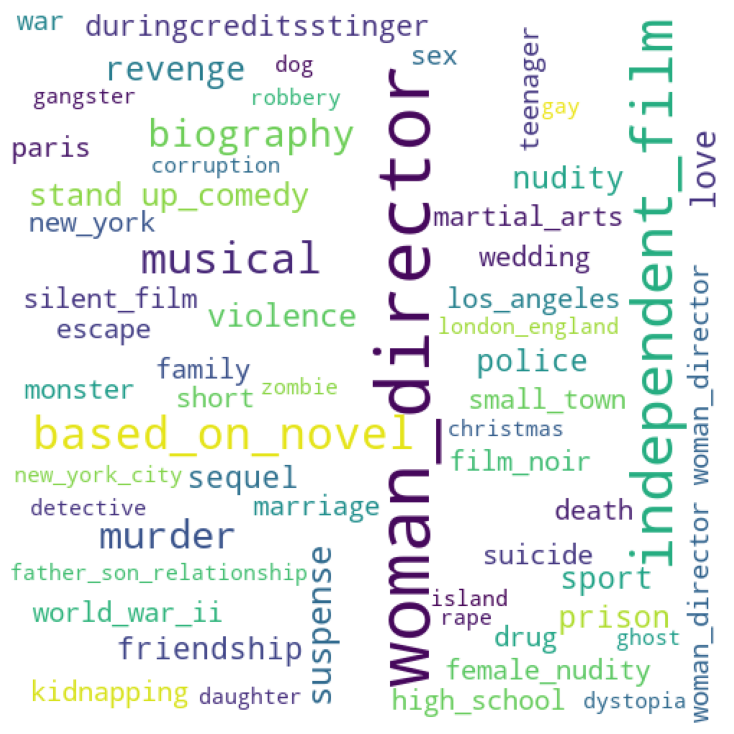

In [13]:
'''
A word cloud is generated here based on the occurance of keyword words
'''
#word_cloud(df['keywords'])
word_cloud(df['keywords'])


<class 'pandas.core.frame.DataFrame'>
Index: 18660 entries, woman_director to 형사_duelist
Columns: 49399 entries, sum to My Best Friend's Girl
dtypes: int64(49399)
memory usage: 6.9+ GB
